<a id="A"></a>
# <div style="text-align:center; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> House Prices - Advanced Regression </b></div>

![apartments](https://images.pexels.com/photos/681331/pexels-photo-681331.jpeg)

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> Import Dependencies </b></div>

In [98]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import octopus_ml as ocm
from scipy import stats
from scipy.stats import norm, skew 
import missingno as msn
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.lines as mlines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)
fig_size = [12, 6]

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> Assemble Dataset </b></div>

In [2]:
df_train = pd.read_csv('../dataset/train.csv')
df_test = pd.read_csv('../dataset/test.csv')

In [3]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> Dataframe Analysis </b></div>

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • DataFrame Shape </span>

In [5]:
print(f'Training shape: {df_train.shape}')
print(f'Test shape: {df_test.shape}')

Training shape: (1460, 81)
Test shape: (1459, 80)


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Data Types </span>

In [6]:
print(f'Unique data in Training set {df_train.dtypes.unique().tolist()}')
print(f'Unique data in Test  set{df_test.dtypes.unique().tolist()}')

Unique data in Training set [dtype('int64'), dtype('O'), dtype('float64')]
Unique data in Test  set[dtype('int64'), dtype('O'), dtype('float64')]


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Dataset Information </span>

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Quantitative Characteristics </span>

In [8]:
df_train.select_dtypes(include=[np.number]).describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Qualitative Characteristics </span>

In [9]:
df_train.select_dtypes(exclude=[np.number]).describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460        588      1460   
unique         6        8          15          16          3         4   
top        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
freq        1141     1434         515         504        445       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> Exploratory Data Analysis </b></div>

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Scatterplot Distribution </span>

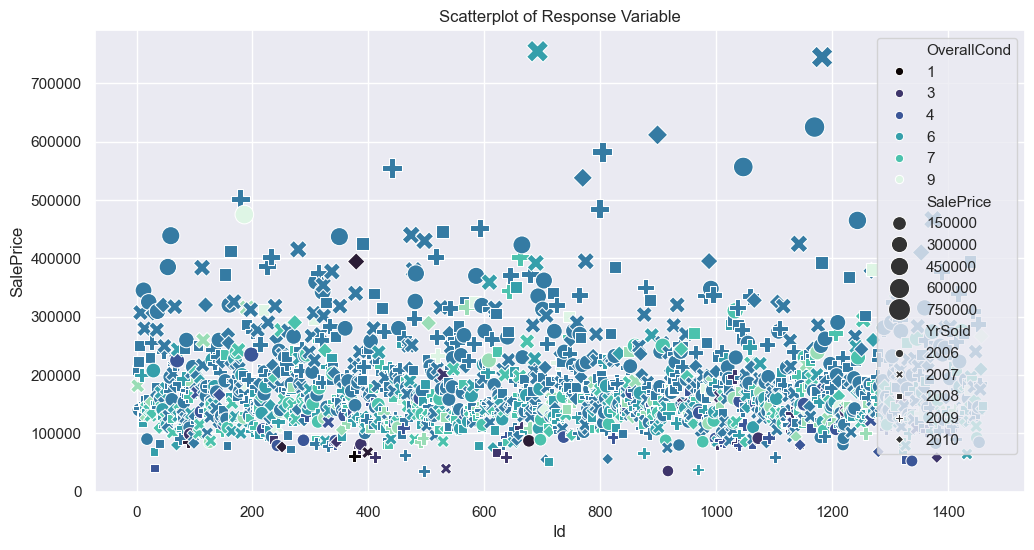

In [10]:
def scatter_distribution(df):
    sns.set(rc={'figure.figsize':fig_size})
    sns.scatterplot(x=df.Id, y=df.SalePrice, size=df.SalePrice, 
                    hue=df.OverallCond, style=df.YrSold, sizes=(70,250), palette="mako")
    plt.title('Scatterplot of Response Variable', fontsize=12)
    plt.show()

scatter_distribution(df_train)

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Barplot of Yearly Distribution </span>

• Yearly distribution:
YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64


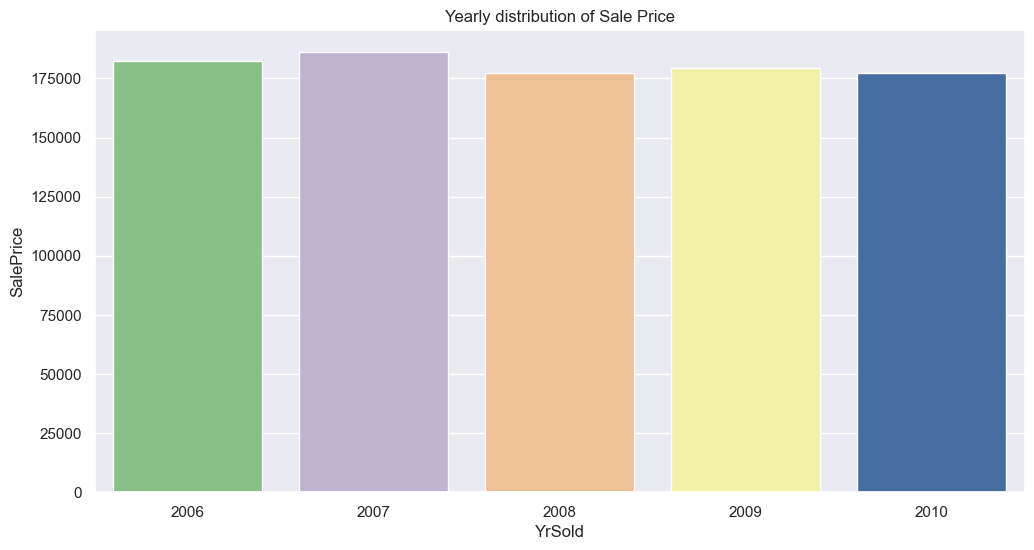

In [11]:
def bar_sale_per_year(df):
    print(f'• Yearly distribution:\n{df.YrSold.value_counts()}')
    sale_per_year = df.groupby('YrSold').SalePrice.mean().reset_index()

    sns.set(rc={'figure.figsize':fig_size})    
    sns.barplot(x=sale_per_year.YrSold, y=sale_per_year.SalePrice, palette="Accent")    
    plt.title('Yearly distribution of Sale Price', fontsize=12)
    plt.show()

bar_sale_per_year(df_train)

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Distribution plot of the Target </span>

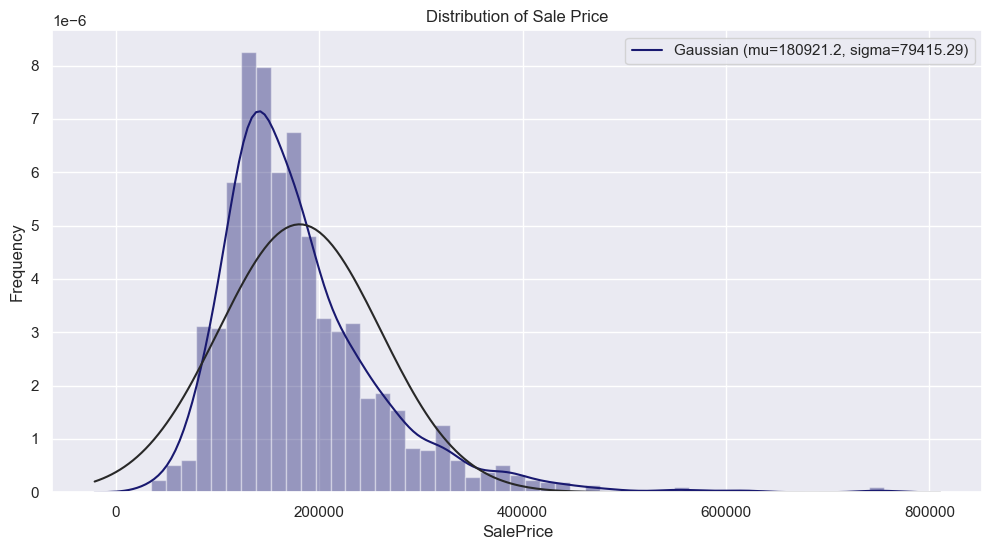

In [12]:
def distplot_target(target):
    sns.set(rc={'figure.figsize':fig_size})        
    sns.distplot(target, fit=norm, color='midnightblue');
    mu, sigma = norm.fit(target)
    
    plt.legend([f'Gaussian (mu={round(mu,2)}, sigma={round(sigma, 2)})'], loc='upper right')
    plt.ylabel('Frequency')      
    plt.title('Distribution of Sale Price', fontsize=12)

distplot_target(df_train.SalePrice)

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Skewness and Kurtosis </span>

In [13]:
print(f'Skewness for the response variable: {df_train.SalePrice.skew()}')
print(f'Kurtosis for the response variable: {df_train.SalePrice.kurt()}')


Skewness for the response variable: 1.8828757597682129
Kurtosis for the response variable: 6.536281860064529


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Target Distribution </span>

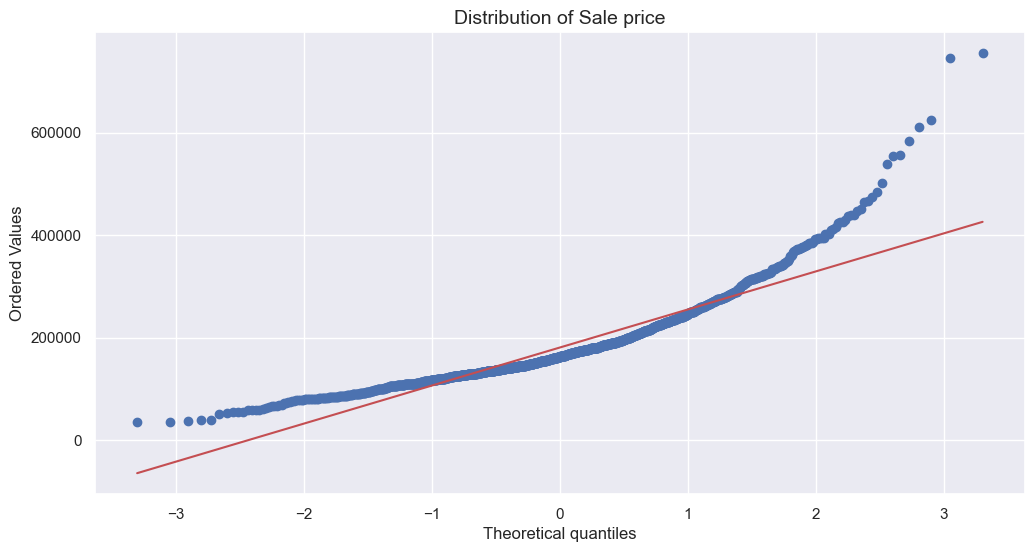

In [14]:
def probplot_target(target):
    sns.set(rc={'figure.figsize':fig_size})
    pplot = stats.probplot(target, dist='norm', plot=plt)
    plt.title('Distribution of Sale price', fontsize=14)
    plt.show()

probplot_target(df_train.SalePrice)


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Predictor Distributions </span>

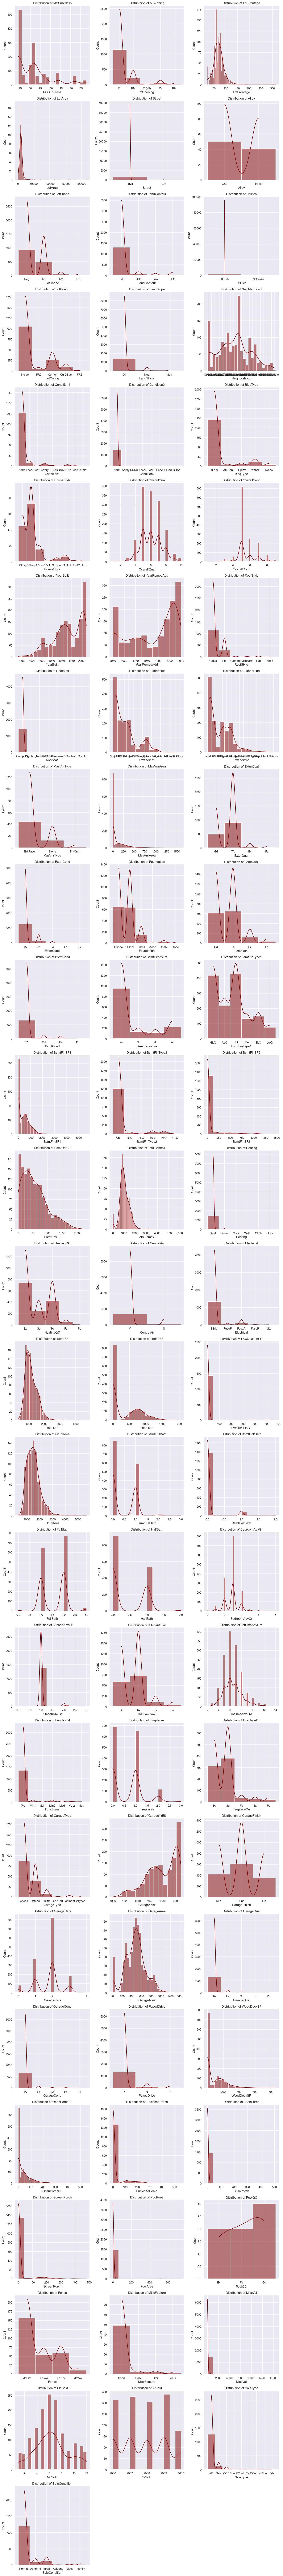

In [15]:
def histogram_predictor(df):
    num_features = len(df.columns)
    num_cols = 3 
    num_rows = math.ceil(num_features / num_cols)  
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))  
    axes = axes.flatten() 
    
    for i, col in enumerate(df.columns):
        sns.histplot(df[col], color='maroon', kde=True, ax=axes[i])  
        axes[i].set_title(f'Distribution of {col}')
        axes[i].grid(True) 
        
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
 
histogram_predictor(df_train.drop(columns=['Id', 'SalePrice'], axis=1))  


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Boxplots for Numerical Features </span>

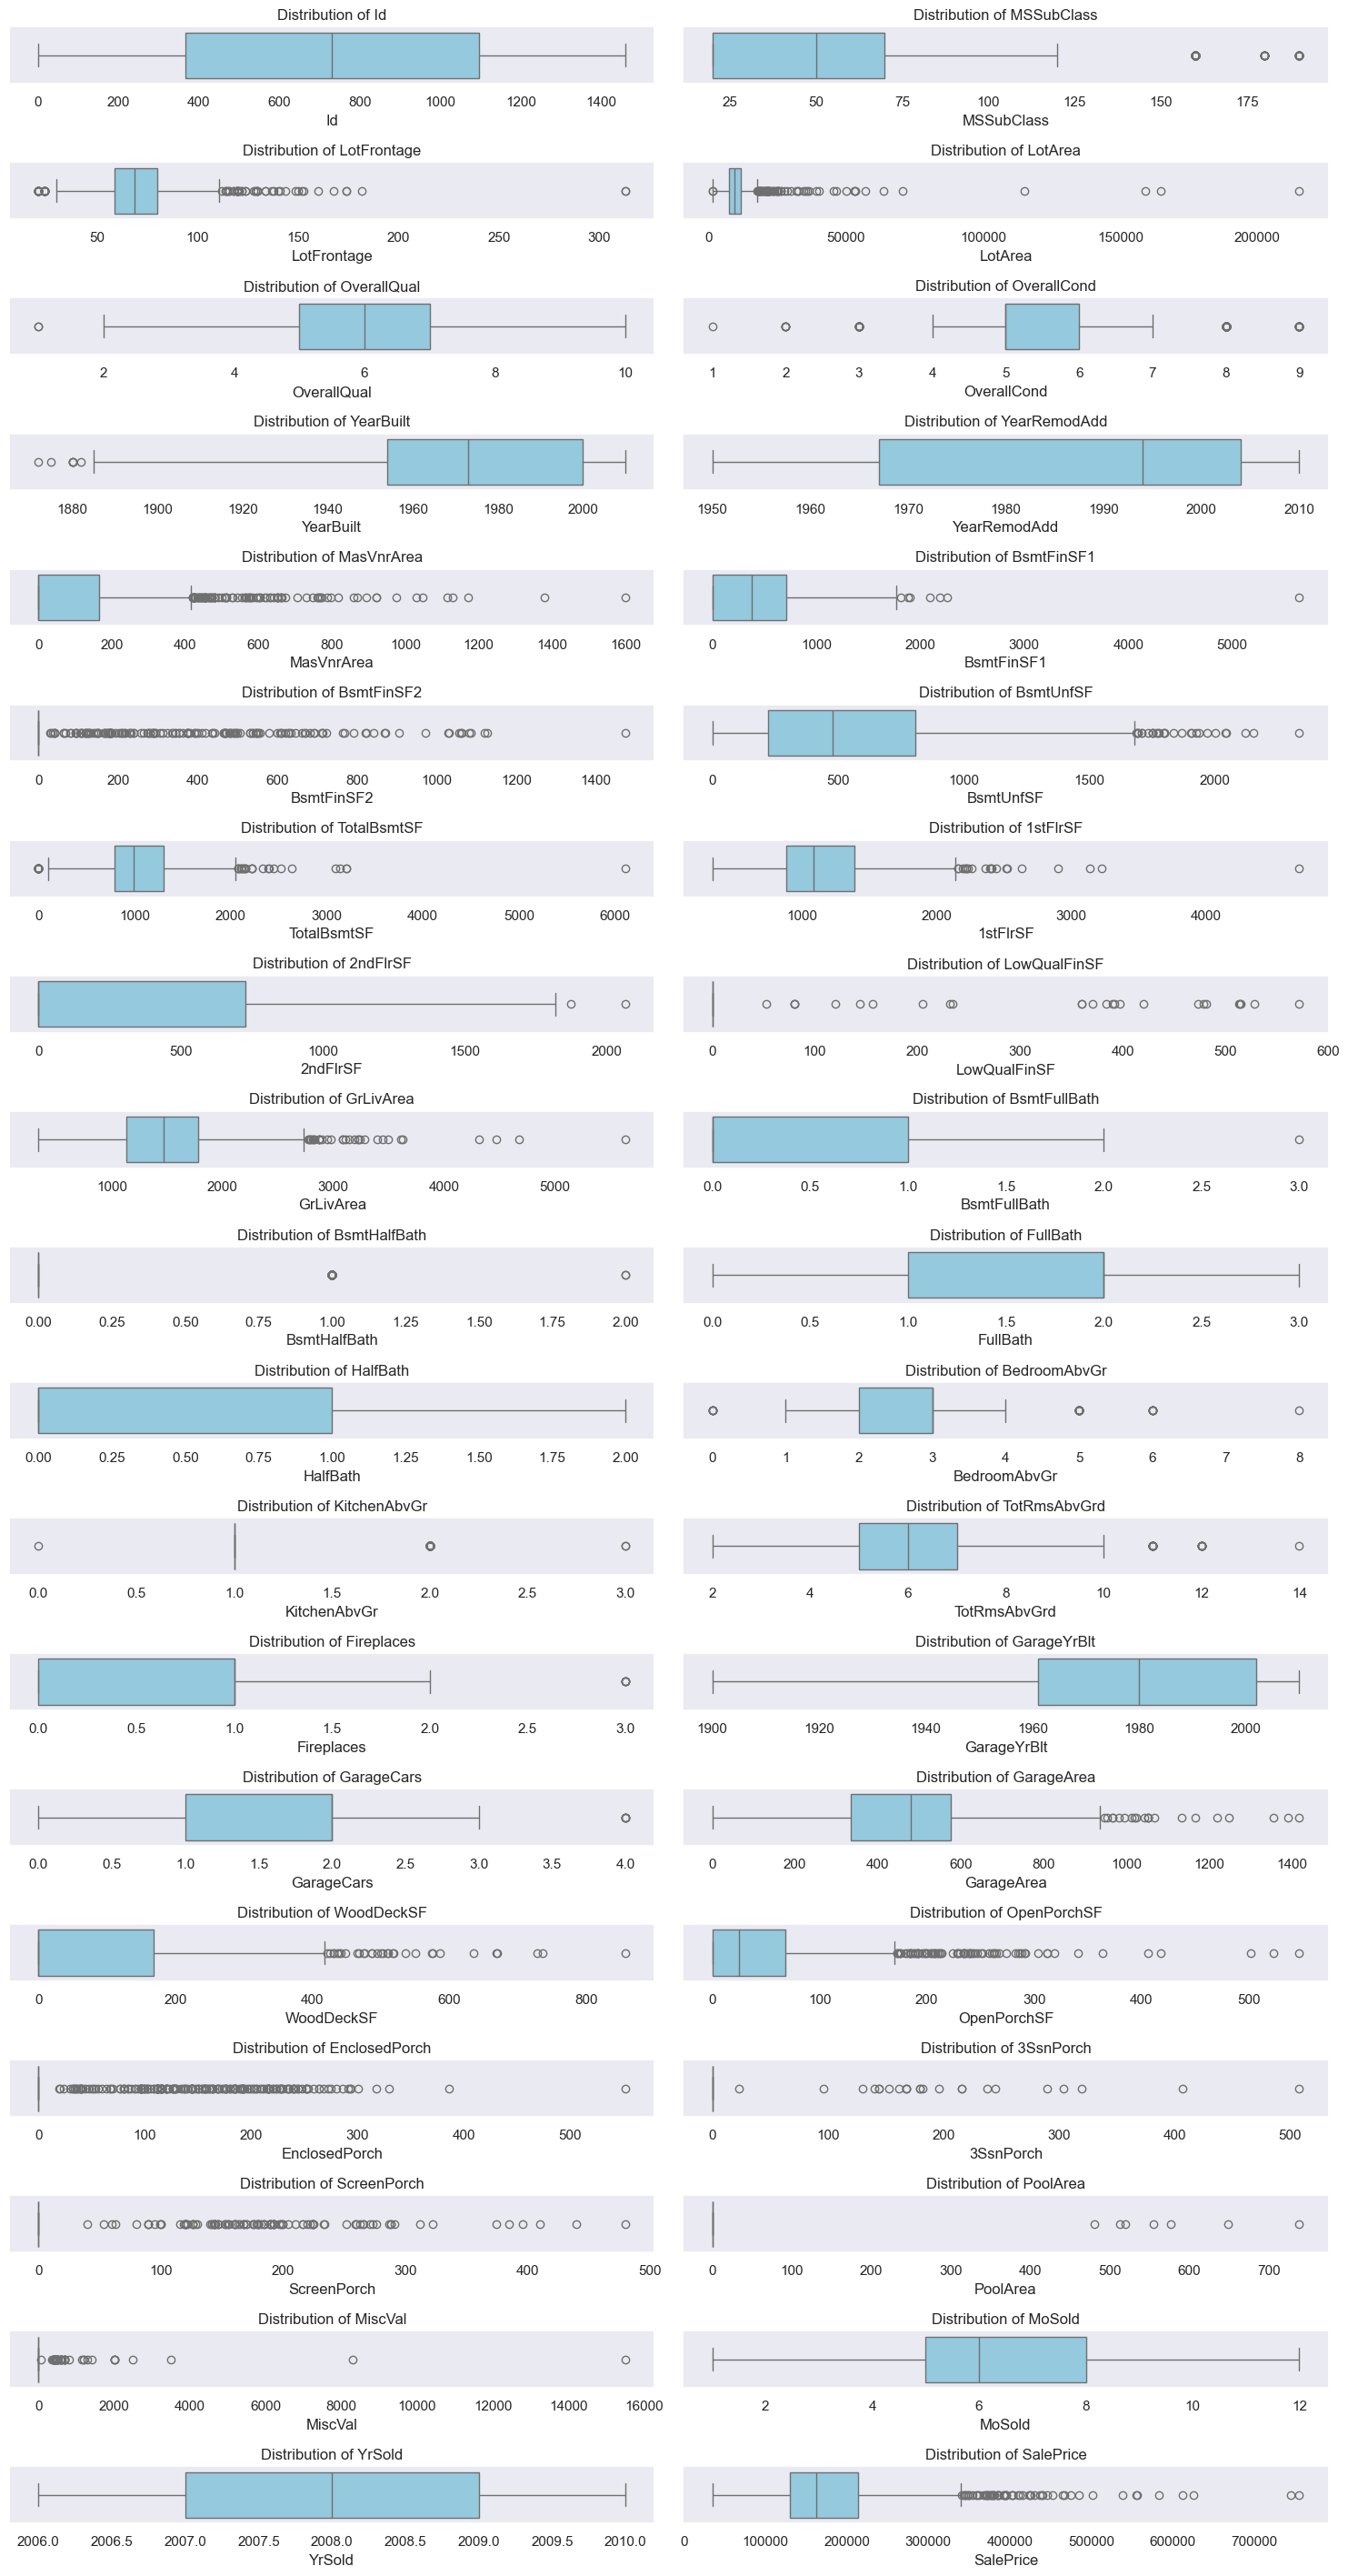

In [16]:
def boxplot_numerical(df):
    num_features = len(df.columns)
    num_cols = 2 
    num_rows = math.ceil(num_features / num_cols)  
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 1.5))  
    axes = axes.flatten() 
    
    for i, col in enumerate(df.columns):
        sns.boxplot(data=df, x=col, color='skyblue', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].grid(False) 
        
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

boxplot_numerical(df_train.select_dtypes(include=[np.number]))  


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Boxplots for Categorical Features based on Target </span>

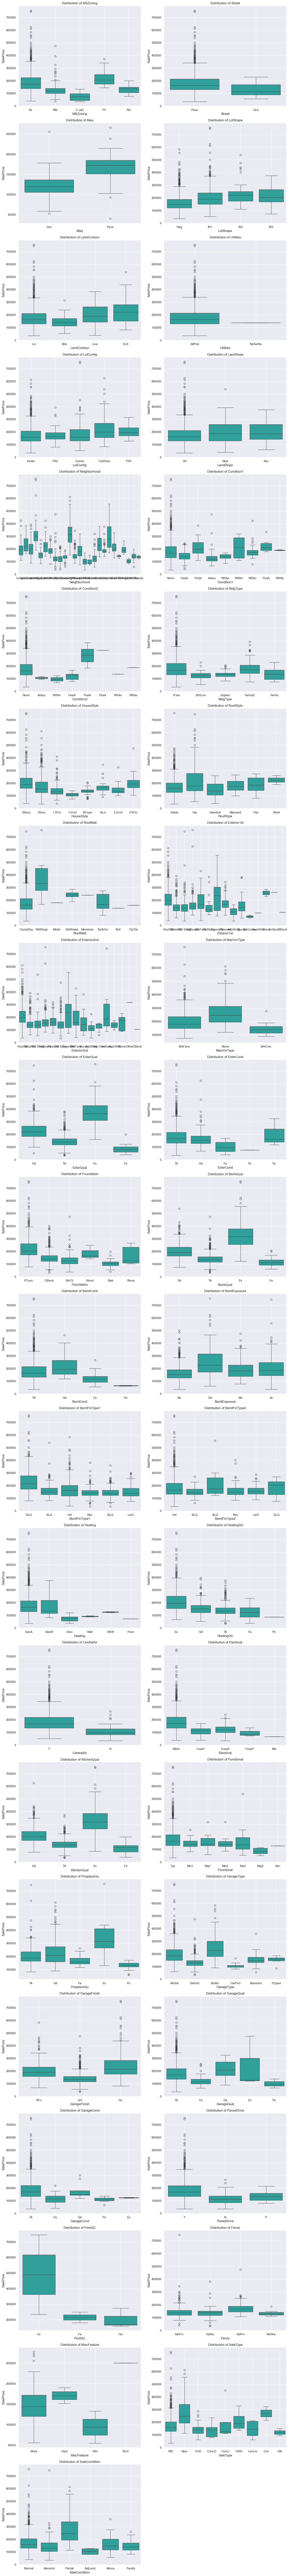

In [17]:
def boxplot_categorical(df, target):
    sns.set_theme(style="darkgrid")
    num_features = len(df.columns)
    num_cols = 2 
    num_rows = math.ceil(num_features / num_cols)  
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 6))  
    axes = axes.flatten() 
    
    for i, col in enumerate(df.columns):
        sns.boxplot(data=df, x=col, y=target, color='lightseagreen', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].grid(True) 
        
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

boxplot_categorical(df_train.select_dtypes(exclude=[np.number]), df_train.SalePrice)  


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Joint Plotting </span>

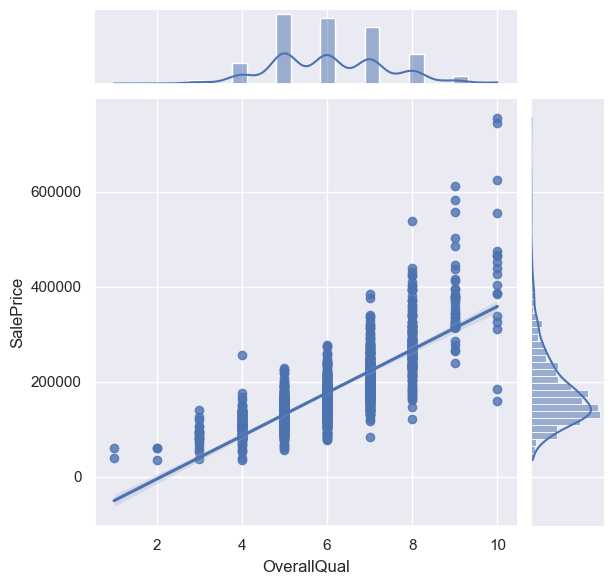

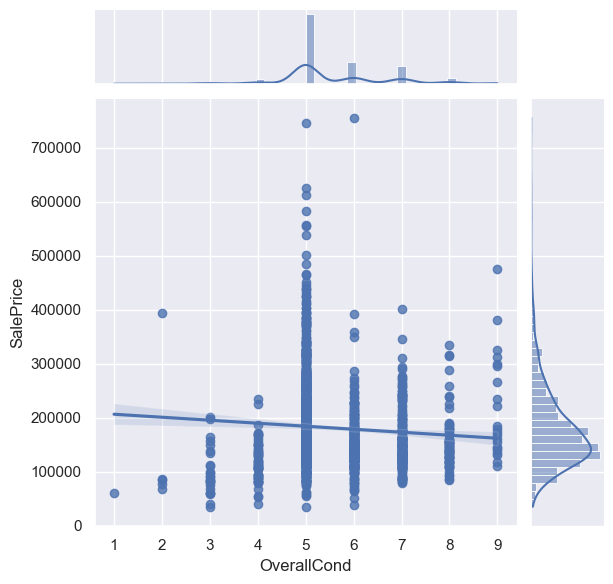

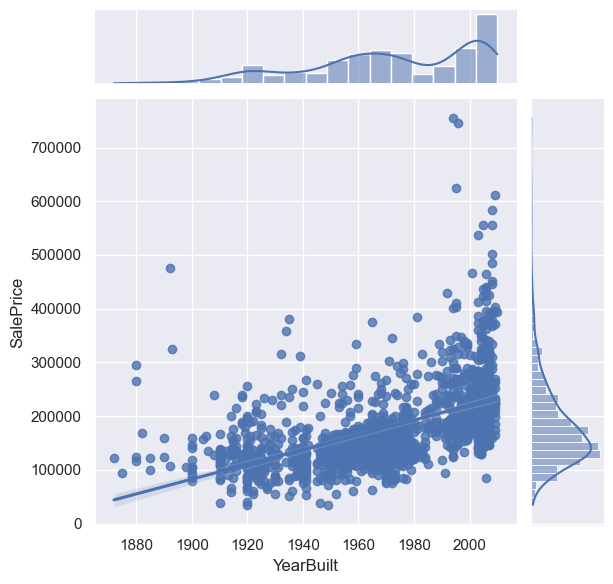

In [18]:
def joint_compare(feature, target):    
    sns.set(rc={'figure.figsize':fig_size})
    sns.jointplot(x=feature, y=target, kind='reg', height=6)    
    plt.show()

features_compare = ['OverallQual', 'OverallCond', 'YearBuilt']
for feature in features_compare:
    joint_compare(df_train[feature], df_train.SalePrice)


<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> Data Cleaning </b></div>

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Data Setups </span>

In [19]:
test_id = df_test['Id']
df_train['SalePrice'] = np.log1p(df_train["SalePrice"])
y = df_train['SalePrice']

In [20]:
df_combined = pd.concat([df_train, df_test], axis=0, sort=False)
df_combined = df_combined.drop(['Id', 'SalePrice'], axis=1)

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Diagnose Null Values in Predictors </span>

In [21]:
print(f"Total Null Values in data set before handling Missing values: {df_combined.isnull().sum().sum()}")

Total Null Values in data set before handling Missing values: 15707


In [22]:
numerical_features = df_combined.select_dtypes(include=[np.number]).columns
categorical_features = df_combined.select_dtypes(exclude=[np.number]).columns

In [23]:
def get_null_perc(df):
    null_features=[(feature,np.round(df[feature].isnull().mean(),2)*100) 
                   for feature in df.columns if df[feature].isnull().sum(0)]
    null_df = pd.DataFrame(null_features, columns=['Features','Null %'])
    return null_df.sort_values(by='Null %', ascending=False)

null_features = get_null_perc(df_combined)
null_features

Features  Null %
30        PoolQC   100.0
32   MiscFeature    96.0
2          Alley    93.0
31         Fence    80.0
6     MasVnrType    61.0
22   FireplaceQu    49.0
1    LotFrontage    17.0
23    GarageType     5.0
24   GarageYrBlt     5.0
25  GarageFinish     5.0
28    GarageQual     5.0
29    GarageCond     5.0
13  BsmtFinType2     3.0
10  BsmtExposure     3.0
11  BsmtFinType1     3.0
9       BsmtCond     3.0
8       BsmtQual     3.0
7     MasVnrArea     1.0
27    GarageArea     0.0
26    GarageCars     0.0
0       MSZoning     0.0
17    Electrical     0.0
21    Functional     0.0
20   KitchenQual     0.0
19  BsmtHalfBath     0.0
18  BsmtFullBath     0.0
16   TotalBsmtSF     0.0
15     BsmtUnfSF     0.0
14    BsmtFinSF2     0.0
12    BsmtFinSF1     0.0
5    Exterior2nd     0.0
4    Exterior1st     0.0
3      Utilities     0.0
33      SaleType     0.0

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Heatmap of Missing Values </span>

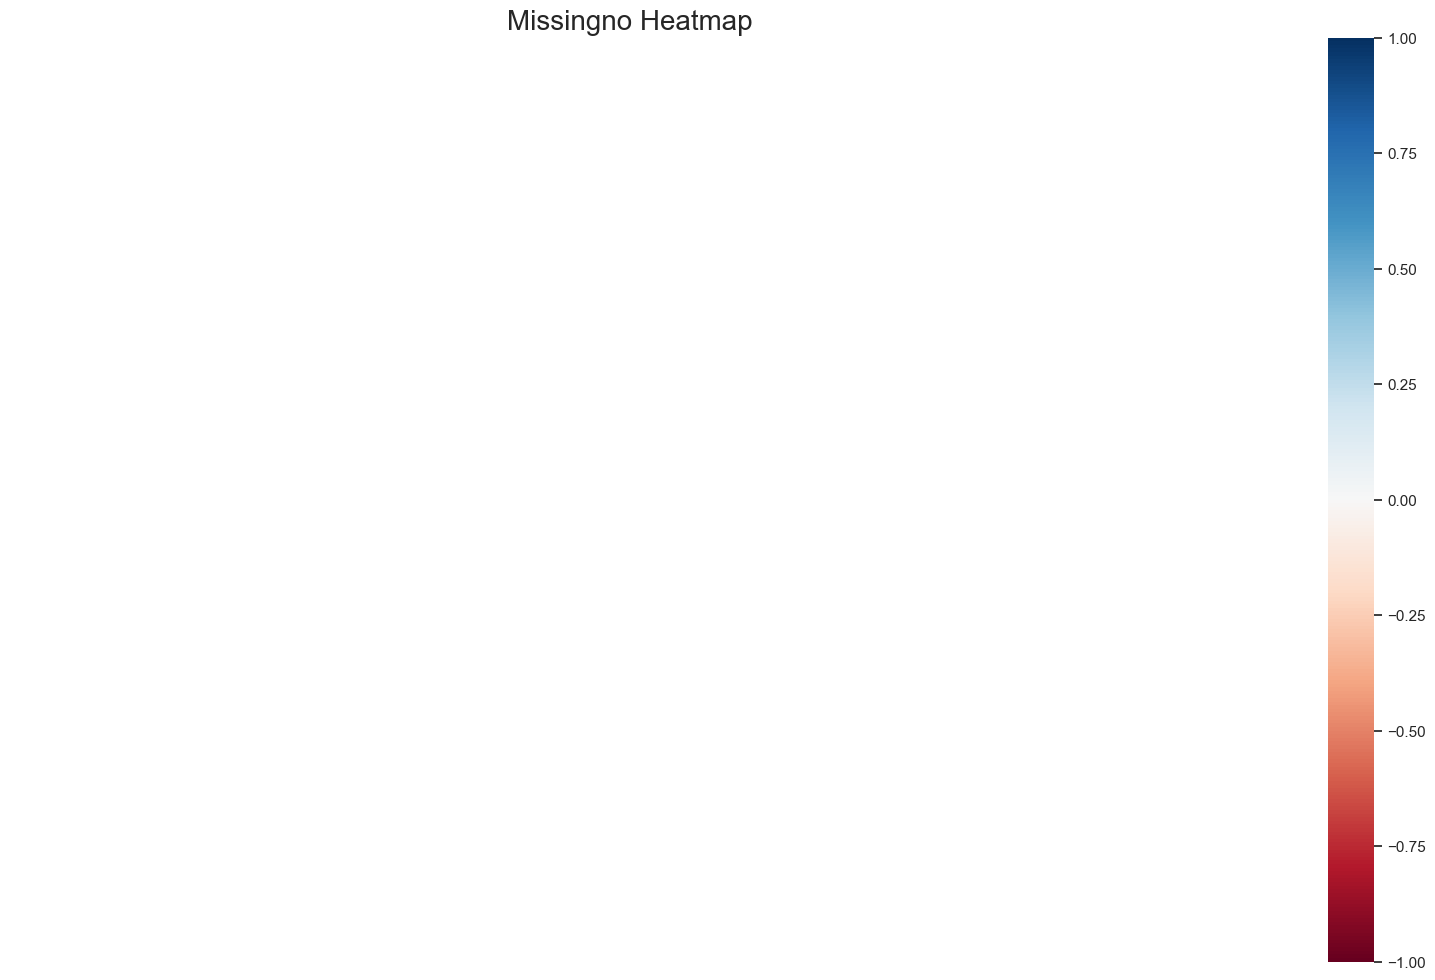

In [100]:
def missingno_heatmap(df):
    msn.heatmap(df)
    plt.title("Missingno Heatmap", fontsize=20)
    plt.show()

missingno_heatmap(df_combined)

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Bar plot of all the Missing Values </span>

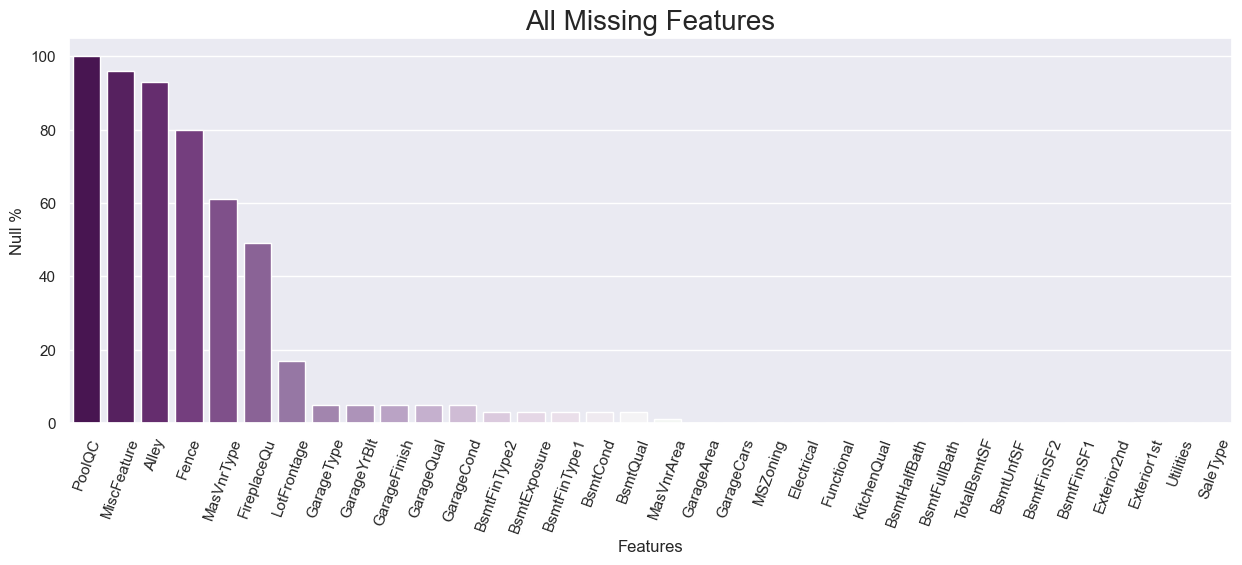

In [24]:
def bar_null_numeric(x, y):
    fig, ax = plt.subplots(figsize=(15, 5))    
    sns.barplot(x=x, y=y, palette='PRGn')
    
    plt.xticks(rotation=70)
    plt.title("All Missing Features", fontsize=20)
    plt.show()
    
bar_null_numeric(null_features['Features'], null_features['Null %'])

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Missing Values for Quantitative and Qualitative features </span>

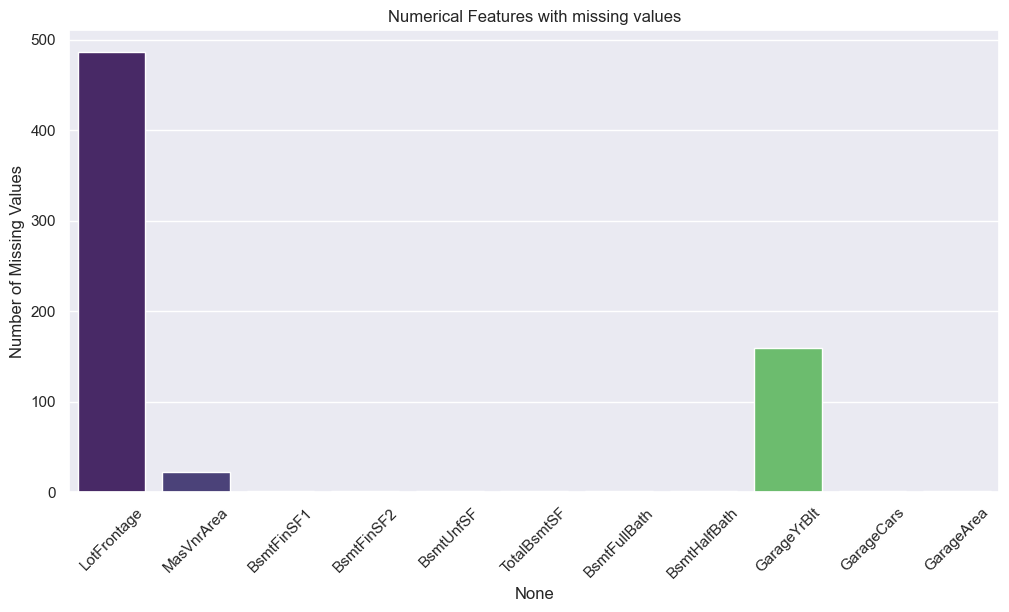

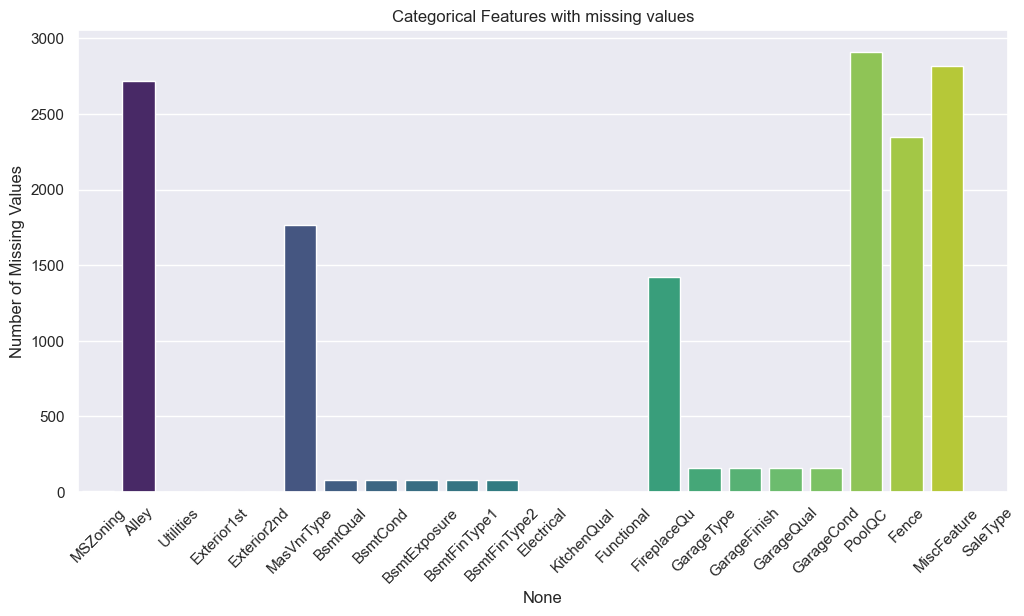

In [25]:
def bar_null(df, data_type):    
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]

    plt.figure(figsize=fig_size)
    sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'{data_type} Features with missing values')
    plt.ylabel('Number of Missing Values')
    plt.show()
    
bar_null(df_combined[numerical_features], 'Quantitative')
bar_null(df_combined[categorical_features], 'Qualitative')

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Handle Missing Values </span>

In [26]:
df_combined.fillna(df_combined[numerical_features].median(), inplace=True)
df_combined[categorical_features] = df_combined[categorical_features].fillna(df_combined[categorical_features].mode().iloc[0])


In [27]:

print(f"Null Values for numerical features after handling Missing values: {df_combined.select_dtypes(include=np.number).isnull().sum().sum()}")
print(f"Null Values for catgorical features after handling Missing values: {df_combined.select_dtypes(exclude=np.number).isnull().sum().sum()}")

Null Values for numerical features after handling Missing values: 0
Null Values for catgorical features after handling Missing values: 0


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Diagnose Skewed Features </span>

In [28]:
skewness = df_combined[numerical_features].skew().sort_values(ascending=False)
skewed_features = skewness[abs(skewness) > 0.5].index
skewed_features

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF',
       'LotFrontage', '1stFlrSF', 'BsmtFinSF1', 'MSSubClass', 'GrLivArea',
       'TotalBsmtSF', 'BsmtUnfSF', '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces',
       'HalfBath', 'BsmtFullBath', 'OverallCond', 'YearBuilt'],
      dtype='object')

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Rescale Skewed Features </span>

In [29]:
df_combined[skewed_features] = np.log1p(df_combined[skewed_features])

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Feature Conversion </span>

In [31]:
convert_features = ['BsmtHalfBath', 'KitchenAbvGr', 'PoolArea', 'Fireplaces', 'FullBath', 'HalfBath', 'GarageCars', 
                    'GarageYrBlt', 'OverallQual', 'MSSubClass', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

astype_features = ['OverallCond', 'YrSold', 'MoSold']

for feature in convert_features:
    df_combined[feature] = df_combined[feature].apply(str)
    
for feature in astype_features:
    df_combined[feature] = df_combined[feature].astype(str)
    

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Pearson Correlation </span>

In [114]:
def pearson_matrix(df): 
    print(df.corr(numeric_only=True)) 

pearson_matrix(df_combined)

               LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.686435    0.142196    0.042579    0.034906   
LotArea           0.686435  1.000000    0.096715    0.068492    0.071697   
MasVnrArea        0.142196  0.096715    1.000000    0.217551   -0.023744   
BsmtFinSF1        0.042579  0.068492    0.217551    1.000000    0.183494   
BsmtFinSF2        0.034906  0.071697   -0.023744    0.183494    1.000000   
BsmtUnfSF         0.061082  0.030176    0.071708   -0.248254   -0.291817   
TotalBsmtSF       0.077049  0.087314    0.196662    0.302079    0.074945   
1stFlrSF          0.436769  0.476858    0.362569    0.201724    0.062272   
2ndFlrSF         -0.099756 -0.065141   -0.051306   -0.195044   -0.124528   
LowQualFinSF     -0.018700 -0.014291   -0.092781   -0.073131   -0.012461   
GrLivArea         0.303882  0.365519    0.315240    0.003176   -0.062821   
BsmtFullBath      0.081006  0.112414    0.160003    0.598905    0.163845   
BedroomAbvGr

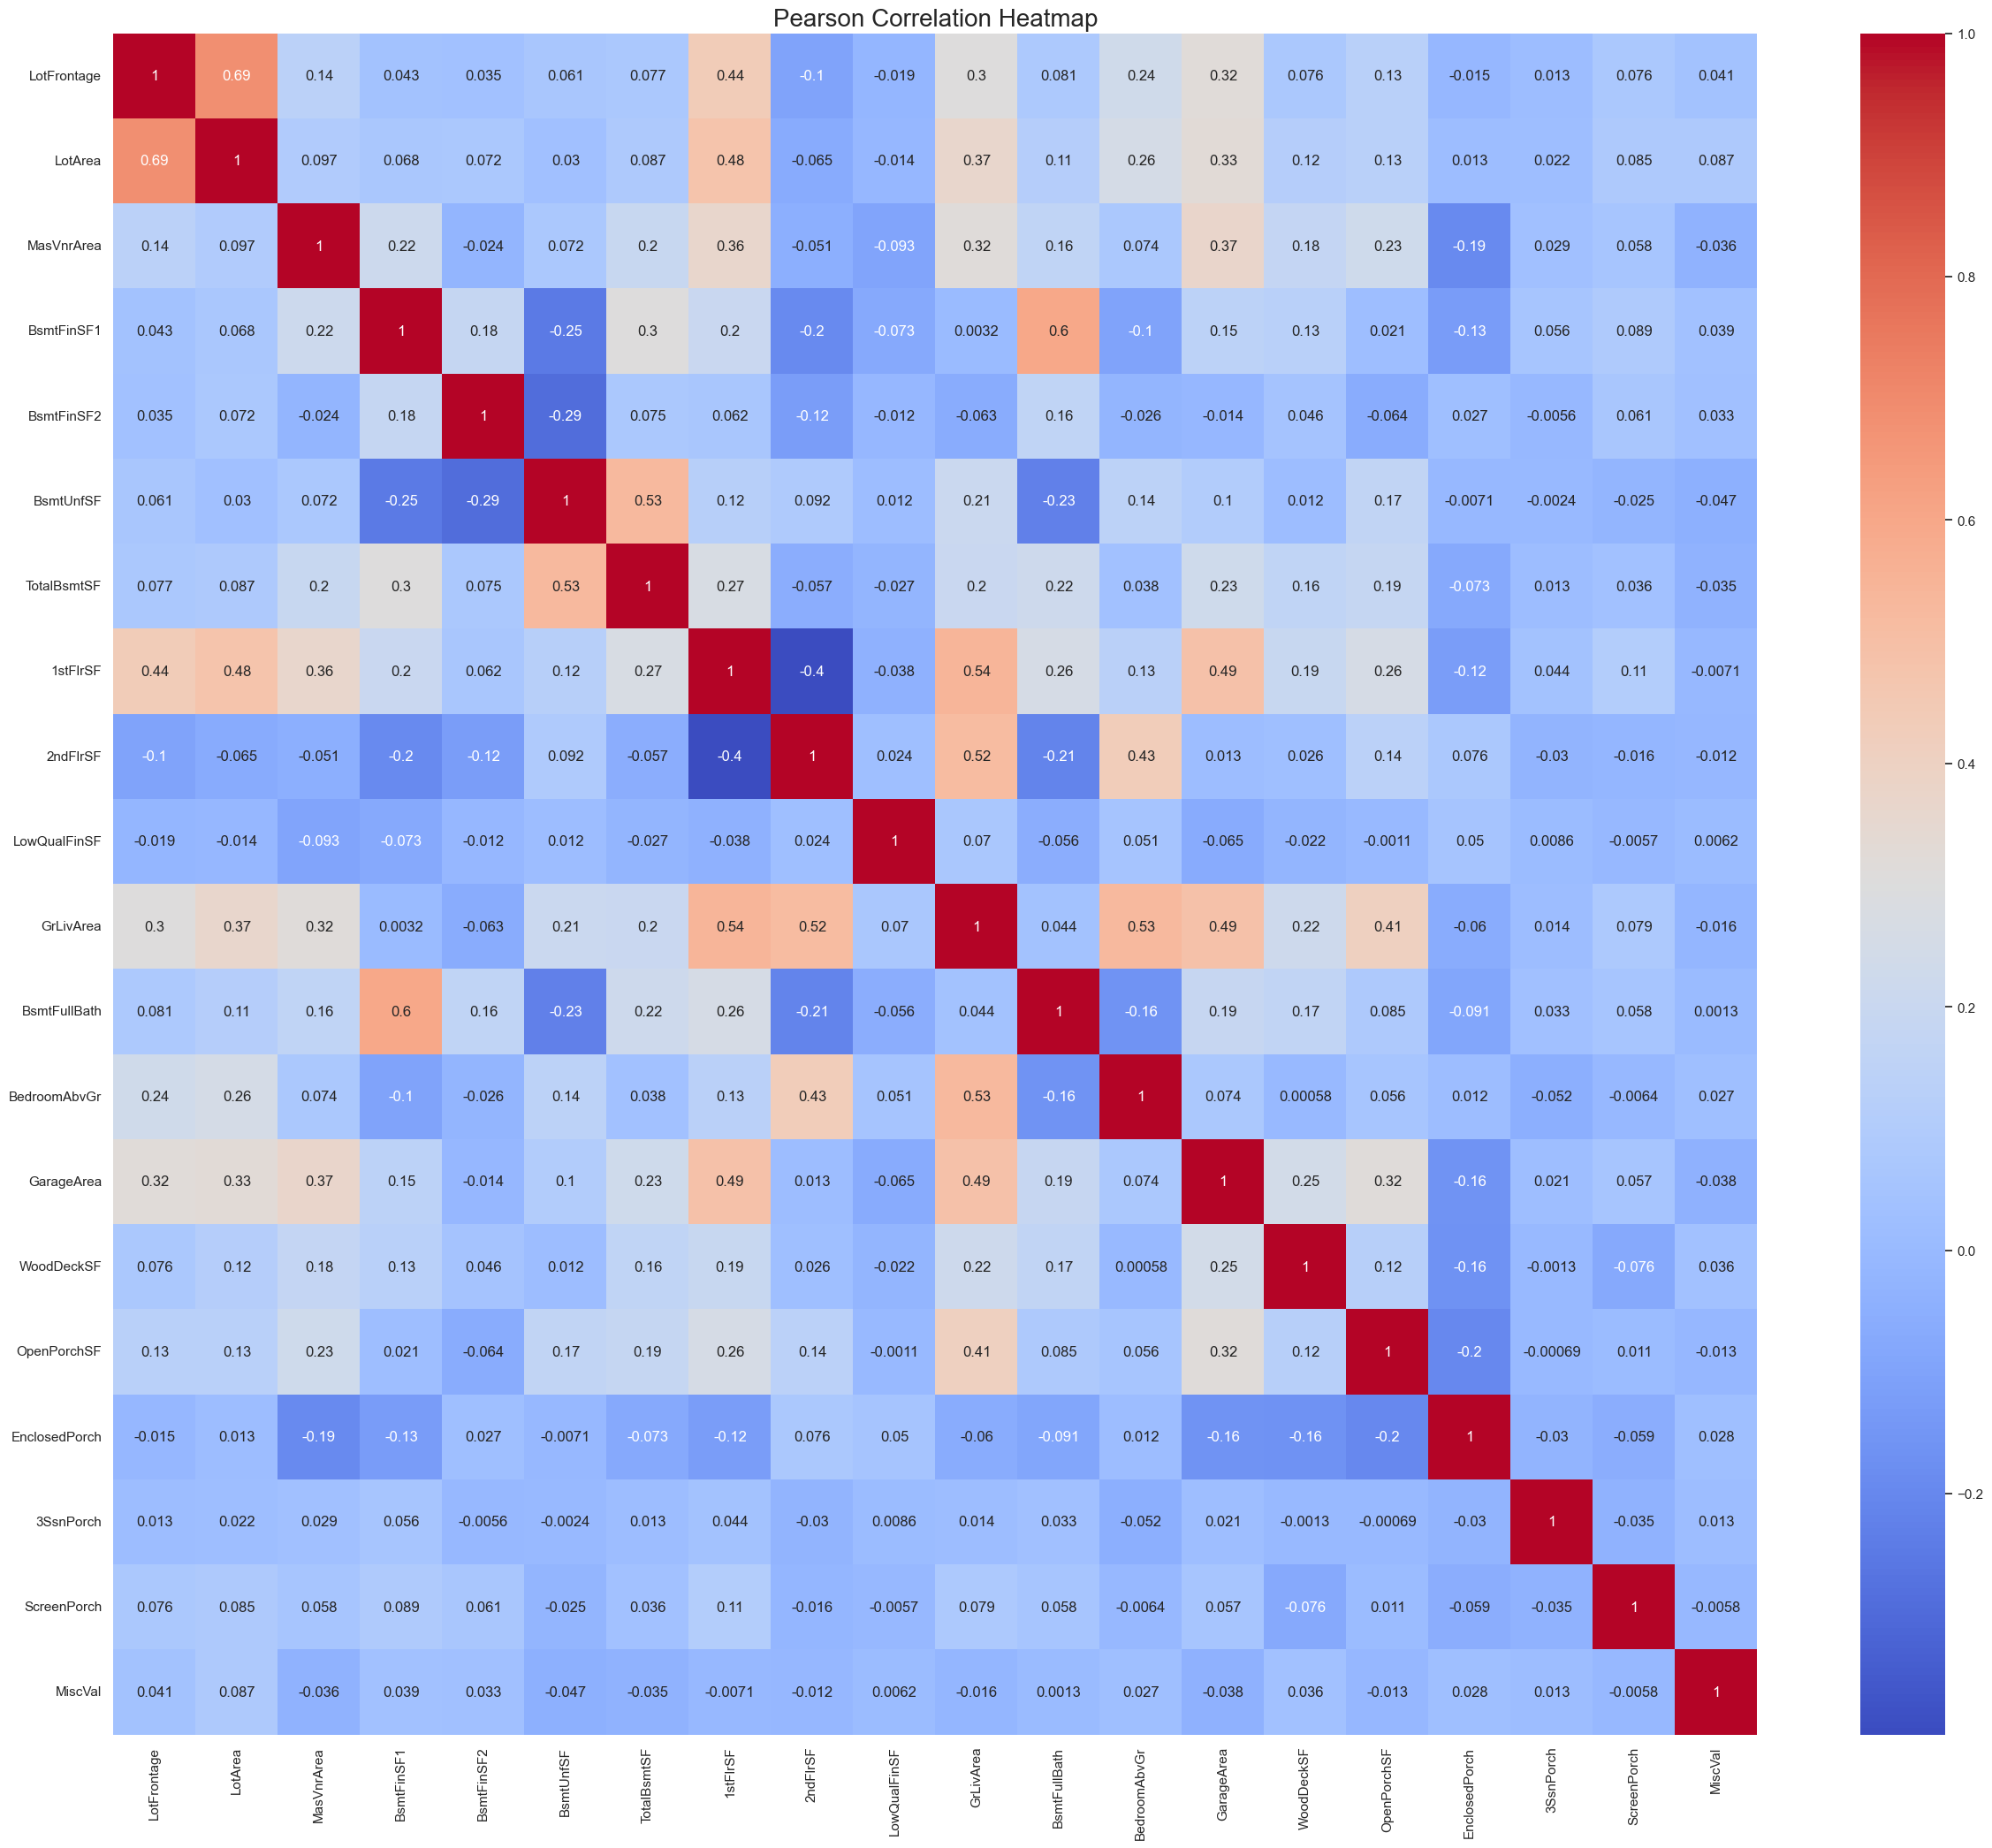

In [115]:
def pearson_correlation(df):     
    plt.figure(figsize=(30, 25))
    color = plt.get_cmap('coolwarm')  
    data = sns.heatmap(df.corr(numeric_only=True), cmap=color, annot=True, fmt='.2g')
    plt.title("Pearson Correlation Heatmap", fontsize=20)
    plt.show()

pearson_correlation(df_combined)

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Cramér's V Algorithm </span>

In [110]:
from scipy.stats import chi2_contingency

def cramers_v(chi2, n, r, k):
    if n == 0 or min(r-1, k-1) == 0:
        return 0
    return np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

def cramers_v_matrix(df, cols):
    n = len(df)
    matrix = pd.DataFrame(index=cols, columns=cols)

    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                matrix[col1][col2] = 1.0  
            else:
                contingency_table = pd.crosstab(df[col1], df[col2])
                if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
                    matrix[col1][col2] = 0
                else:
                    chi2, p, dof, expected = chi2_contingency(contingency_table)
                    r, k = contingency_table.shape
                    matrix[col1][col2] = cramers_v(chi2, n, r, k)

    return matrix.astype(float)

cramers_v_df = cramers_v_matrix(df_combined, categorical_features)
cramers_v_df.head()

MSZoning    Street     Alley  LotShape  LandContour  Utilities  \
MSZoning     1.000000  0.284954  0.492393  0.157126     0.080145   0.009908   
Street       0.284954  1.000000  0.000000  0.031061     0.102742   0.000000   
Alley        0.492393  0.000000  1.000000  0.037728     0.045088   0.000000   
LotShape     0.157126  0.031061  0.037728  1.000000     0.120326   0.026281   
LandContour  0.080145  0.102742  0.045088  0.120326     1.000000   0.006230   

             LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
MSZoning      0.078254   0.050385      0.653330    0.105230    0.052790   
Street        0.022878   0.095155      0.242989    0.149827    0.006547   
Alley         0.060651   0.018830      0.434770    0.052079    0.016885   
LotShape      0.220864   0.095259      0.273645    0.115445    0.053113   
LandContour   0.061124   0.437635      0.373760    0.073367    0.088015   

             BldgType  HouseStyle  RoofStyle  RoofMatl  Exterior1st  \
MSZoning     0.199116    0.181219   0.090812  0.033814     0.211528   
Street       0.055564    0.041021   0.013151  0.007856     0.072018   
Alley        0.222913    0.088995   0.100879  0.016531     0.140672   
LotShape     0.094768    0.113575   0.046407  0.152434     0.129764   
LandContour  0.079575    0.122904   0.134531  0.169595     0.128962   

             Exterior2nd  MasVnrType  ExterQual  ExterCond  Foundation  \
MSZoning        0.218797    0.065908   0.228141   0.101337    0.248405   
Street          0.066774    0.055200   0.239588   0.064009    0.096438   
Alley           0.161908    0.023247   0.102541   0.022154    0.137098   
LotShape        0.134975    0.077412   0.132834   0.047678    0.142617   
LandContour     0.130551    0.073089   0.125532   0.054049    0.107149   

             BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
MSZoning     0.210747  0.116844      0.097101      0.141651      0.062011   
Street       0.062278  0.046940      0.042494      0.041466      0.053064   
Alley        0.068015  0.051466      0.084532      0.082452      0.045916   
LotShape     0.170536  0.054108      0.122886      0.102538      0.049454   
LandContour  0.127576  0.058866      0.193762      0.094819      0.056065   

              Heating  HeatingQC  CentralAir  Electrical  KitchenQual  \
MSZoning     0.060983   0.131179    0.288496    0.123713     0.178637   
Street       0.008040   0.062893    0.057638    0.028001     0.079109   
Alley        0.078053   0.070114    0.010717    0.023824     0.101256   
LotShape     0.044616   0.090680    0.126601    0.094729     0.117463   
LandContour  0.035578   0.077343    0.132298    0.065759     0.112185   

             Functional  FireplaceQu  GarageType  GarageFinish  GarageQual  \
MSZoning       0.051896     0.094983    0.189714      0.240762    0.117504   
Street         0.037845     0.017442    0.103974      0.027795    0.014537   
Alley          0.041821     0.055925    0.131383      0.030631    0.018320   
LotShape       0.033182     0.092031    0.156860      0.204871    0.074462   
LandContour    0.073954     0.052290    0.091762      0.127873    0.052343   

             GarageCond  PavedDrive    PoolQC     Fence  MiscFeature  \
MSZoning       0.093074    0.243952  0.017176  0.041590     0.011489   
Street         0.024539    0.109362  0.002916  0.019318     0.003767   
Alley          0.022074    0.035291  0.007520  0.024749     0.009715   
LotShape       0.058602    0.115142  0.088158  0.045086     0.036457   
LandContour    0.031098    0.070209  0.051955  0.039683     0.021701   

             SaleType  SaleCondition  
MSZoning     0.123678       0.132033  
Street       0.109809       0.173415  
Alley        0.069923       0.070542  
LotShape     0.065484       0.070277  
LandContour  0.074051       0.102327

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Cramér's V Heatmap </span>

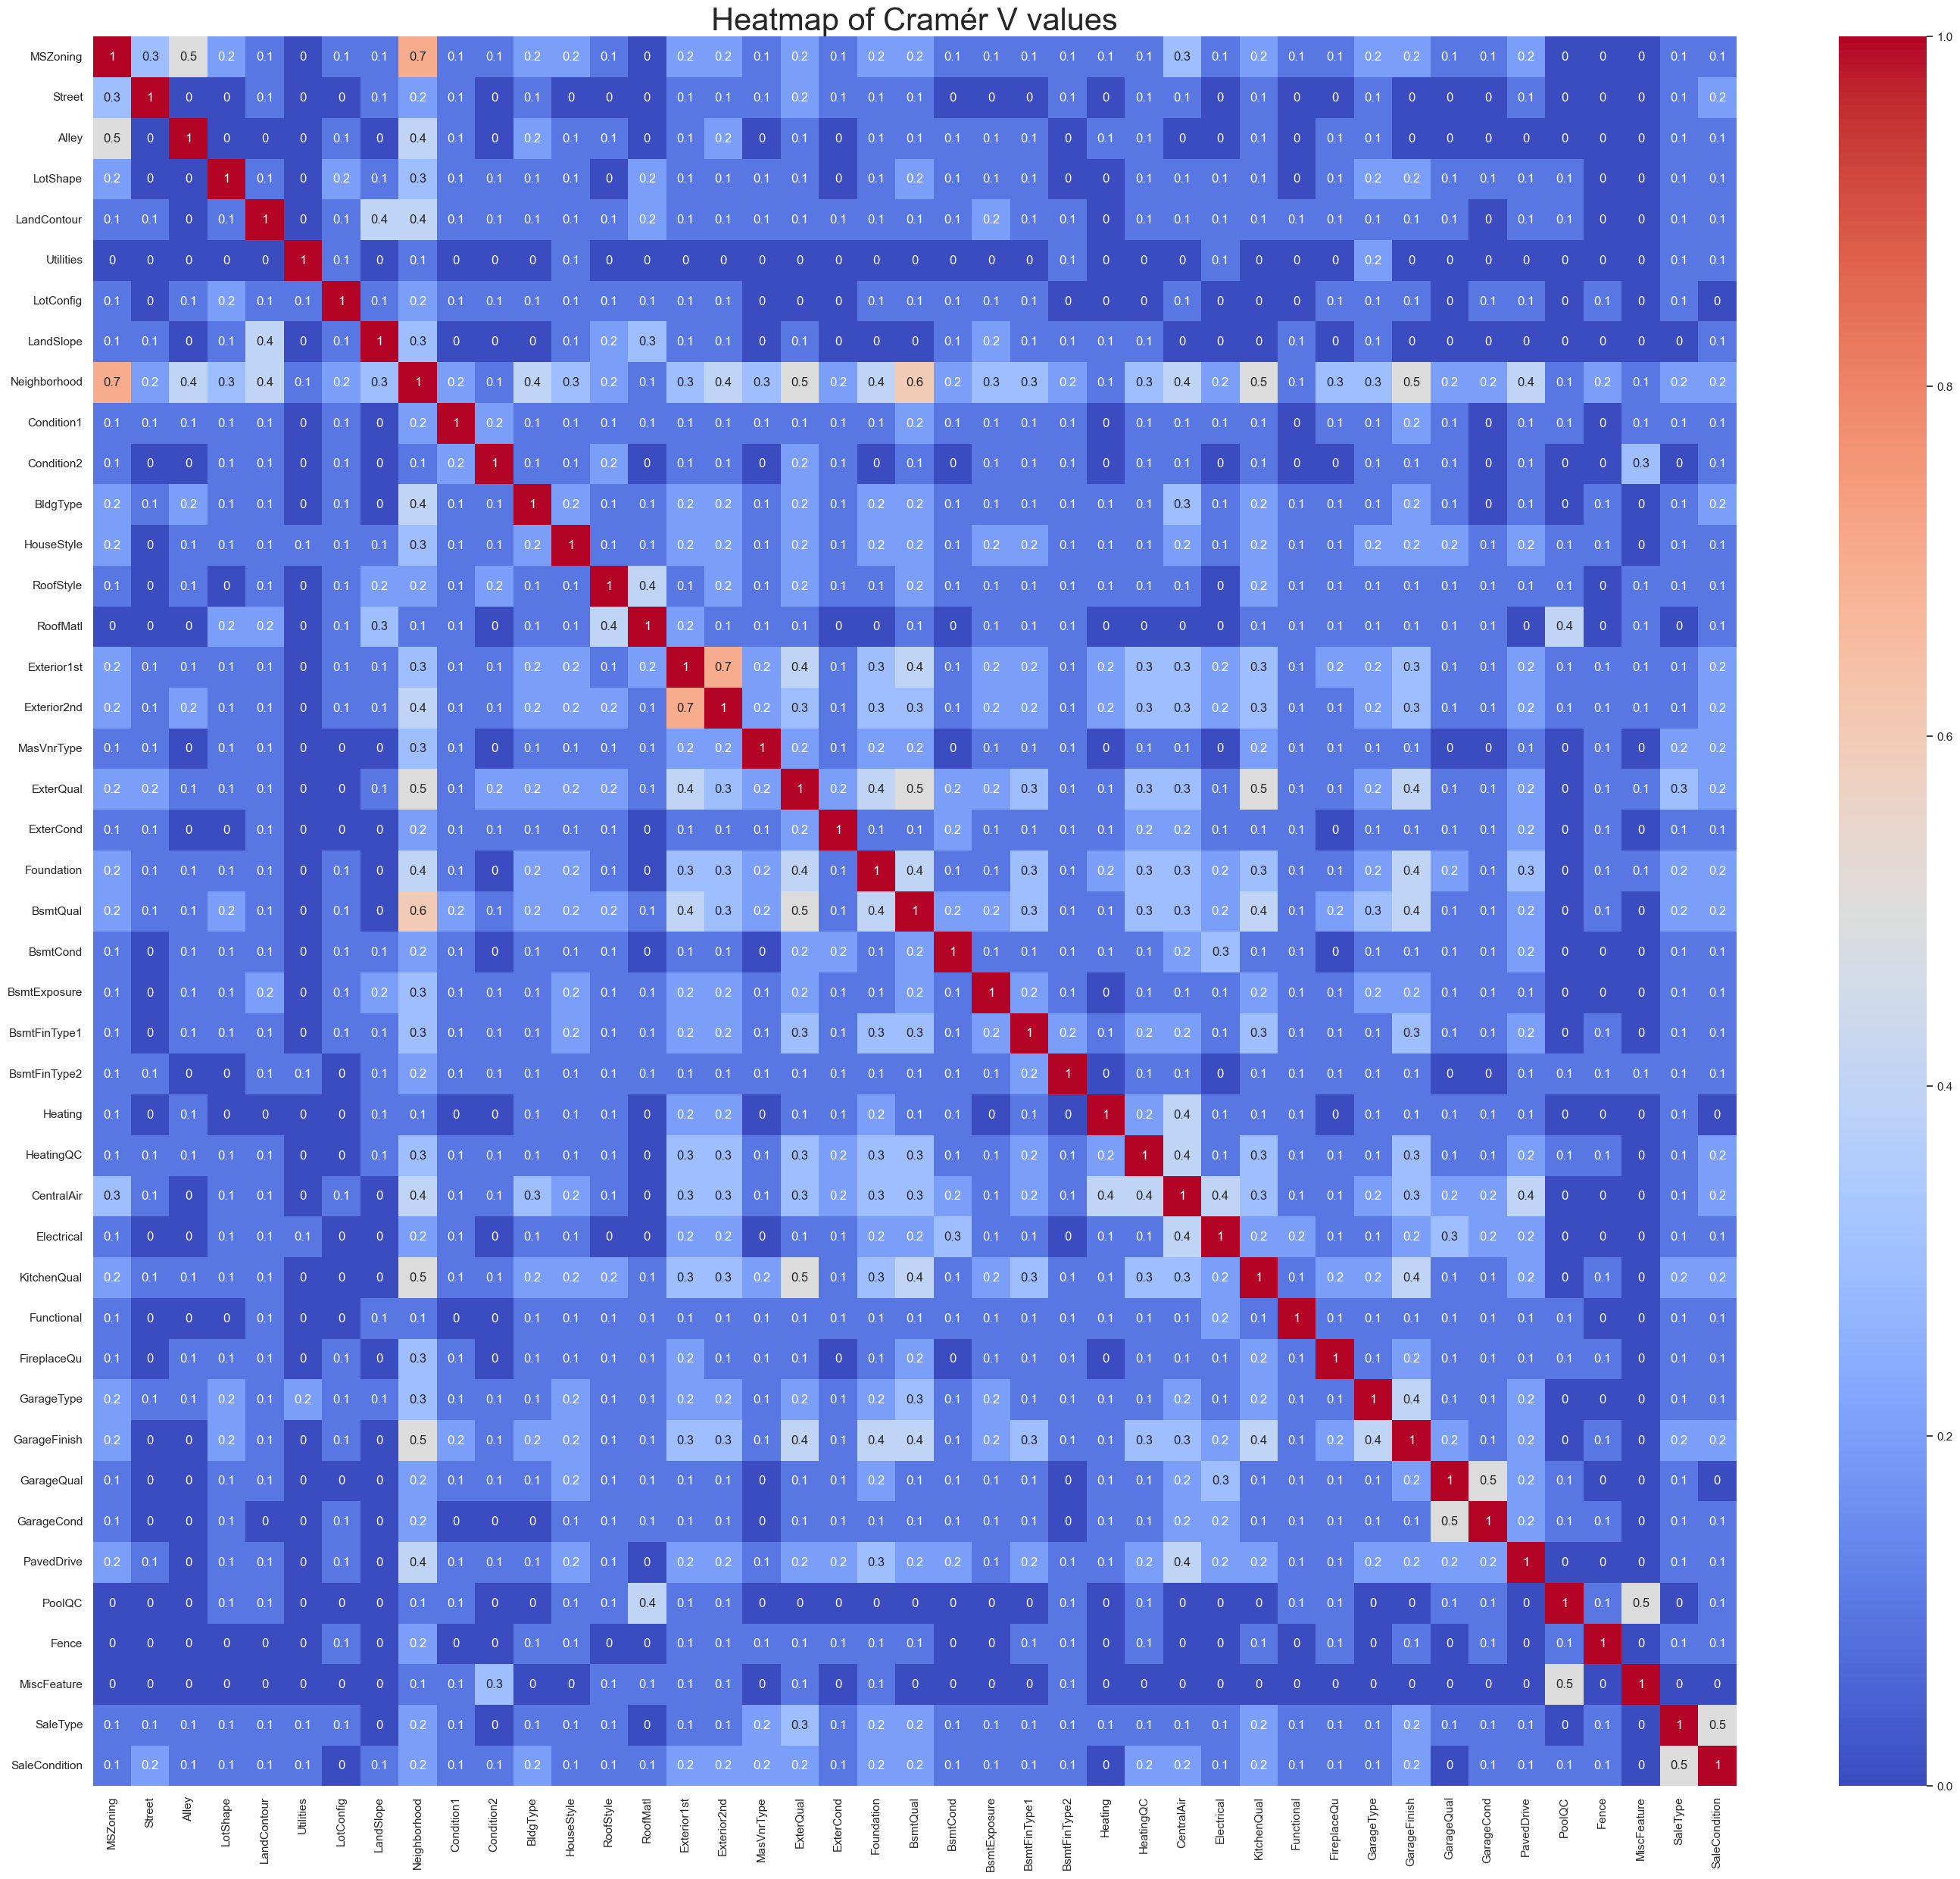

In [111]:
def plot_cramers_heatmap(df):
    plt.figure(figsize=(35, 30))
    sns.heatmap(round(df, 1), annot=True, cmap="coolwarm")
    plt.title("Heatmap of Cramér V values", fontsize=30)
    plt.show()

plot_cramers_heatmap(cramers_v_df)

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Qualitative Rankings </span>

<Figure size 3000x2500 with 0 Axes>

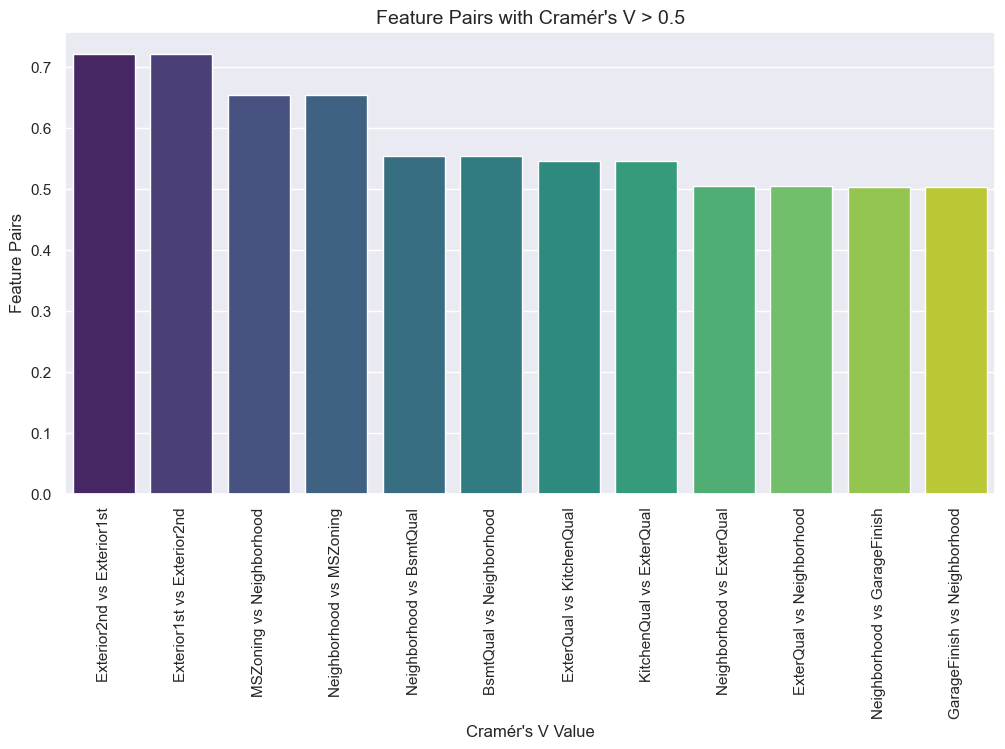

In [112]:
def plot_correlations_bar(df, threshold):
    plt.figure(figsize=(30, 25))
    selected_features_with_values = []

    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2 and cramers_v_df[col1][col2] > threshold:
                selected_features_with_values.append((f'{col1} vs {col2}', df[col1][col2]))

    selected_df = pd.DataFrame(selected_features_with_values, columns=['Feature Pair', 'Cramér\'s V']).drop_duplicates()
    selected_df = selected_df.sort_values(by='Cramér\'s V', ascending=False)

    plt.figure(figsize=fig_size)
    sns.barplot(y='Cramér\'s V', x='Feature Pair', data=selected_df, palette='viridis')

    plt.title('Feature Pairs with Cramér\'s V > 0.5', fontsize=14)
    plt.xlabel('Cramér\'s V Value', fontsize=12)
    plt.ylabel('Feature Pairs', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

threshold = 0.5 
plot_correlations_bar(cramers_v_df, threshold)


<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> Pipeline Setup </b></div>

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Data Allocations </span>

In [73]:
train = df_combined[:len(df_train)]
test = df_combined[len(df_train):]

In [75]:
print(train.shape, test.shape)

(1460, 79) (1459, 79)


In [74]:
X = train

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Pipeline Construction</span>

In [77]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', MinMaxScaler()) 
])

oh_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(drop='if_binary',handle_unknown='ignore',sparse_output=False))  
])


In [78]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),
        ('oh', oh_pipeline, categorical_features)
    ])


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • Graph Methods </span>

In [59]:
def residual_scatter(y_val, y_prediction, model_name):
    fig, ax1 = plt.subplots(figsize=fig_size)
    sns.residplot(x=y_val, y=y_prediction, color='maroon', lowess=True, ax=ax1)
    plt.grid(True)
    plt.title(f"Residual plot for {model_name}")
    plt.show()

    fig, ax2 = plt.subplots(figsize=fig_size)
    sns.scatterplot(x=y_val, y=y_prediction, color='darkgreen', ax=ax2)
    line = mlines.Line2D([0, 1], [0, 1], color='red')
    transform = ax2.transAxes
    line.set_transform(transform)
    ax2.add_line(line)
    plt.legend(['Validation', 'Training'])
    plt.grid(True)
    plt.title(f"Residual plot for {model_name}")
    plt.show()
    
def residual_dist(residuals, applied_model):
    fig, ax = plt.subplots(figsize=fig_size)
    sns.distplot(residuals, color='darkblue')
    plt.grid(True)
    plt.title(f"Distribution plot for {model_name}")
    plt.show()


<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> Gradient Boosting Regressor </b></div>

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> • GridSearchCV and Model Training </span>

In [79]:
model_name = 'Gradient Boosting Regressor'
param_grid = {
            'max_depth': [None, 1, 3],
            'n_estimators': [50, 100, 150]
        }

gbr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('model', GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=param_grid, 
                           cv=3, verbose=0, scoring='neg_mean_squared_log_error'))  
])

gbr_pipeline.fit(X_train, y_train)

gbr_model = gbr_pipeline.named_steps['model']  
best_params = gbr_model.best_params_ 
best_score = gbr_model.best_score_  

print(f'\nBest parameters: {best_params}') 
print(f'Best score: {best_score}\n')

gbr_model = GradientBoostingRegressor(**best_params)

gbr_pipeline = Pipeline(steps=[     
    ('preprocessor', preprocessor),       
    ('model', gbr_model)   
])

gbr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLiv...
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('model',
                 GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
                              param_grid={'max_depth': [None, 1, 3],
                                          'n_estimators': [50, 100, 150]},
                              scoring='neg_mean_squared_log_error'))])


Best parameters: {'max_depth': 3, 'n_estimators': 150}
Best score: -0.00010356911069310446



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLiv...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('model', GradientBoostingRegressor(n_estimators=150))])

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> Model Evaluations </b></div>

Training score: 0.97
Validation score: 0.83
RMSE: 0.02
MAE: 0.02


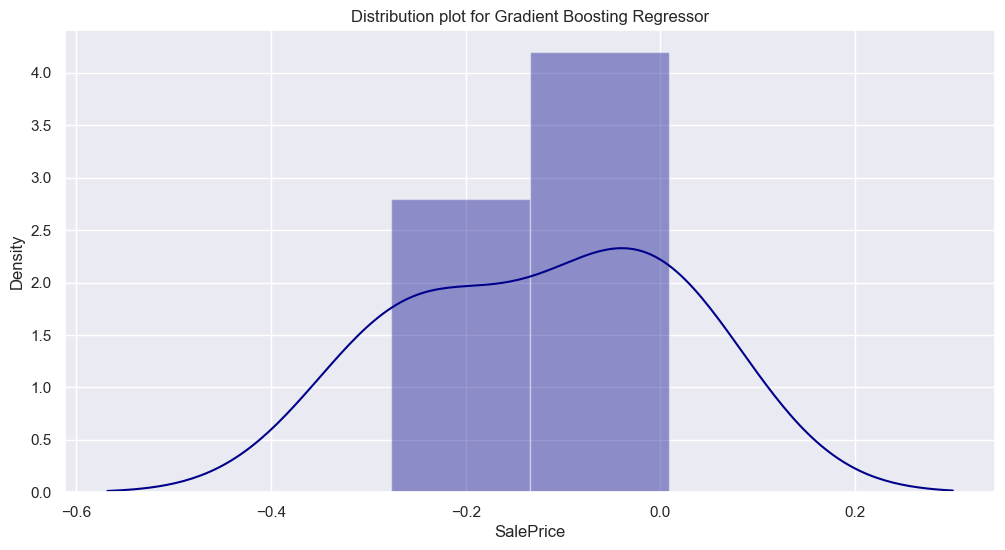

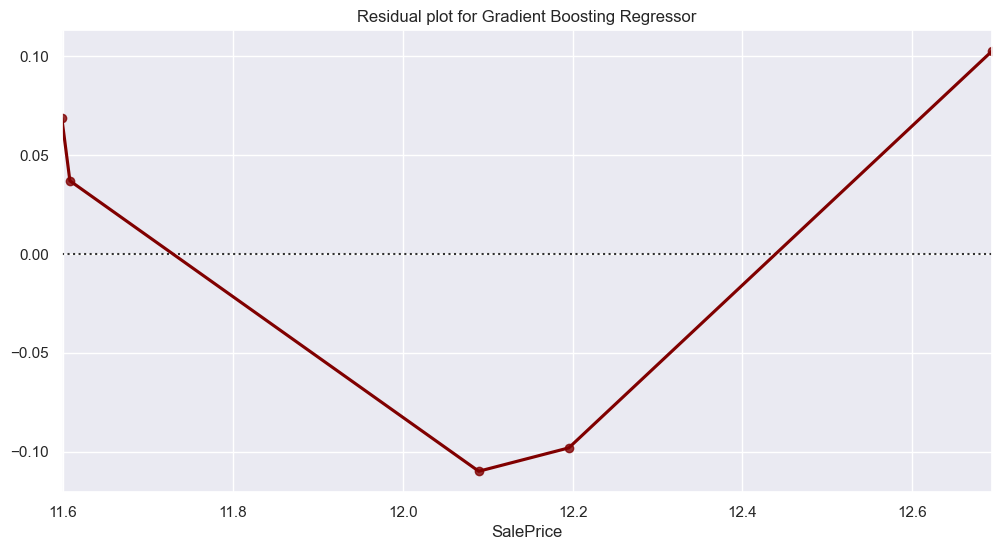

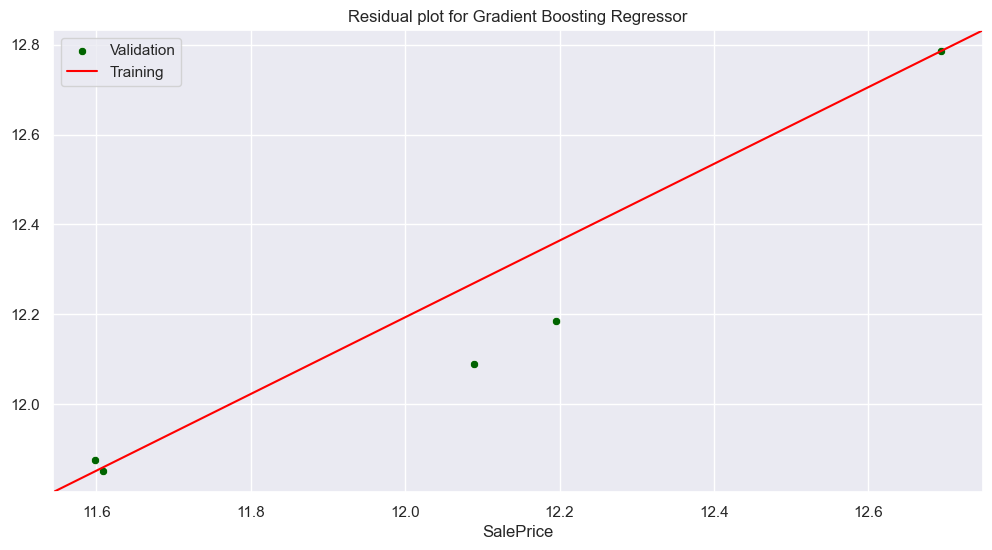

In [80]:
gbr_train_score = gbr_pipeline.score(X_train, y_train)
gbr_val_score = gbr_pipeline.score(X_val, y_val)

y_prediction = gbr_pipeline.predict(X_val)
residuals = y_val - y_prediction

print(f'Training score: {gbr_train_score:.2f}')
print(f'Validation score: {gbr_val_score:.2f}')

gbr_rmse = mean_squared_error(np.log2(y_val), np.log2(y_prediction), squared=False)
gbr_mae = mean_absolute_error(np.log2(y_val), np.log2(y_prediction))

print(f'RMSE: {gbr_rmse:.2f}')
print(f'MAE: {gbr_mae:.2f}')

residual_dist(residuals, model_name)
residual_scatter(y_val, y_prediction, model_name)


<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> Submissions </b></div>

In [81]:
y_prediction = np.expm1(gbr_pipeline.predict(test))


In [82]:
def submit_method(test_id, y_prediction):
    sub = pd.DataFrame()
    sub['Id'] = test_id
    sub['SalePrice'] = y_prediction
    sub.to_csv('../submission/submission.csv', index=False)
    
submit_method(test_id, y_prediction)